In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
housing_train = pd.read_csv('data/train.csv')
housing_train.columns = housing_train.columns.str.lower()

In [3]:
housing_train.head(2)

,id,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,medhouseval
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946


# Exploratory Analysis

In [4]:
housing_train.isna().sum()

id             0
medinc         0
houseage       0
averooms       0
avebedrms      0
population     0
aveoccup       0
latitude       0
longitude      0
medhouseval    0
dtype: int64

In [5]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   medinc       37137 non-null  float64
 2   houseage     37137 non-null  float64
 3   averooms     37137 non-null  float64
 4   avebedrms    37137 non-null  float64
 5   population   37137 non-null  float64
 6   aveoccup     37137 non-null  float64
 7   latitude     37137 non-null  float64
 8   longitude    37137 non-null  float64
 9   medhouseval  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [6]:
housing_train.describe()

,id,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,medhouseval
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


With the above information, we can see that the minimum value in all columns (besides id) is greater than zero. Therefore there are no null values.

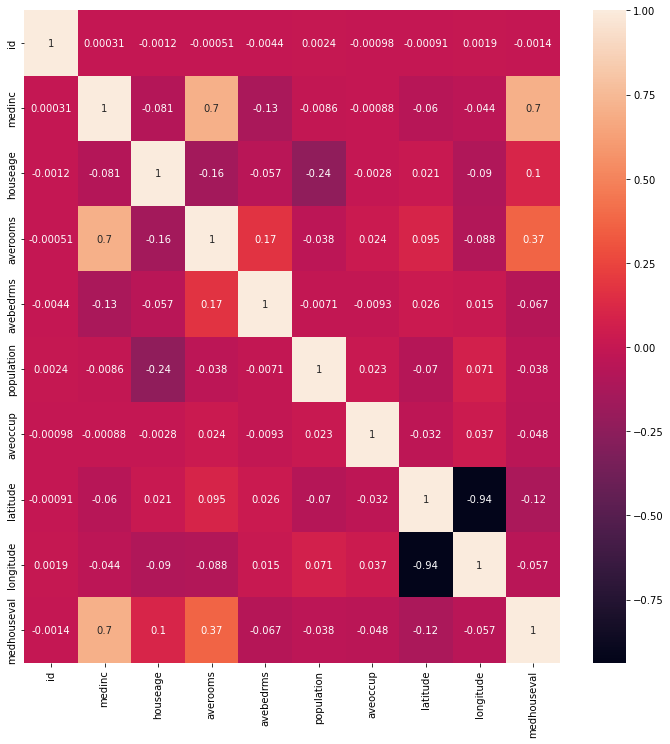

In [7]:
#This is a heatmap of the above information that makes it easier to see the features
#that correlate with each other (if any).
plt.figure(figsize=(12,12))
sns.heatmap(housing_train.corr(), annot=True)
plt.show()

The correlation map above shows that median income is highly correlated with the median value of the house, along with average number of rooms.  This makes sense as you spend more on a house if you earn more money.

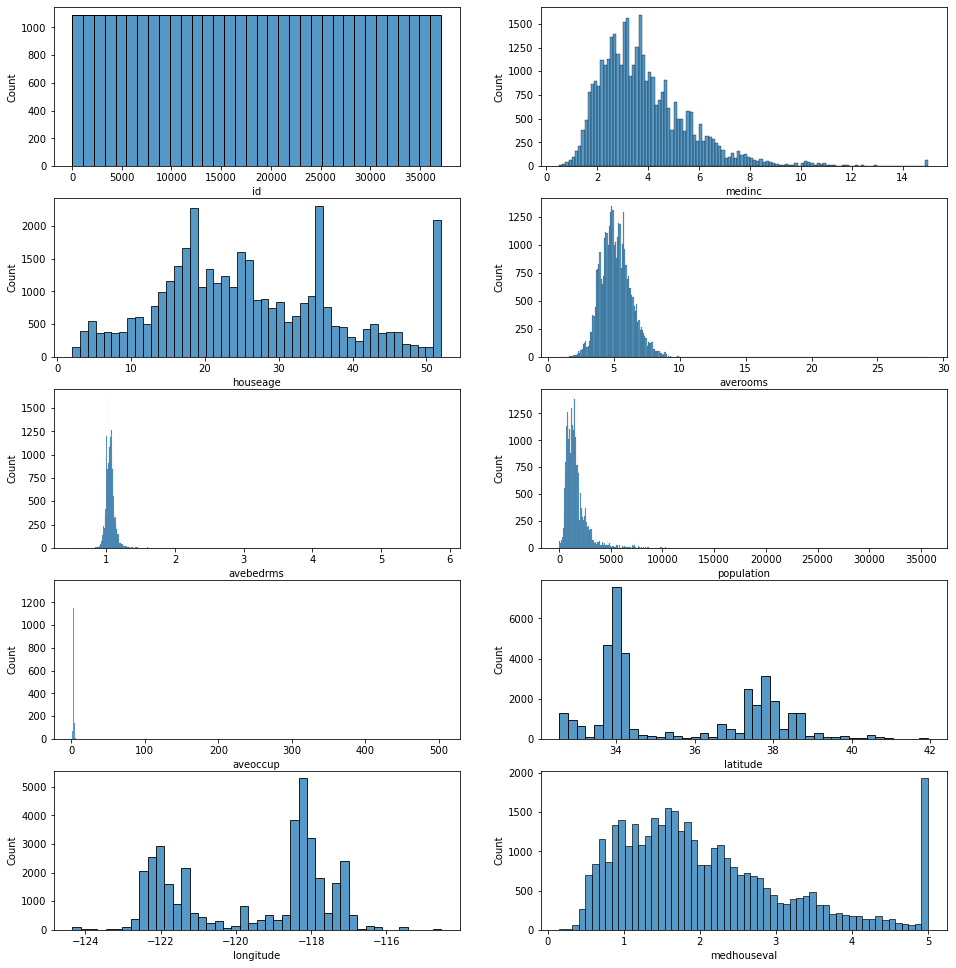

In [8]:
# Lets look at the distribution plot of the features
pos = 1
fig = plt.figure(figsize=(16,24))
for i in housing_train.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.histplot(housing_train[i],ax=ax)

In [9]:
a = housing_train['avebedrms'].value_counts()
a

1.000000    1002
1.058824     103
1.052632      76
1.038462      66
1.090909      64
            ... 
1.010363       1
1.007745       1
1.112660       1
1.150198       1
0.966019       1
Name: avebedrms, Length: 14066, dtype: int64

<Figure size 720x720 with 0 Axes>

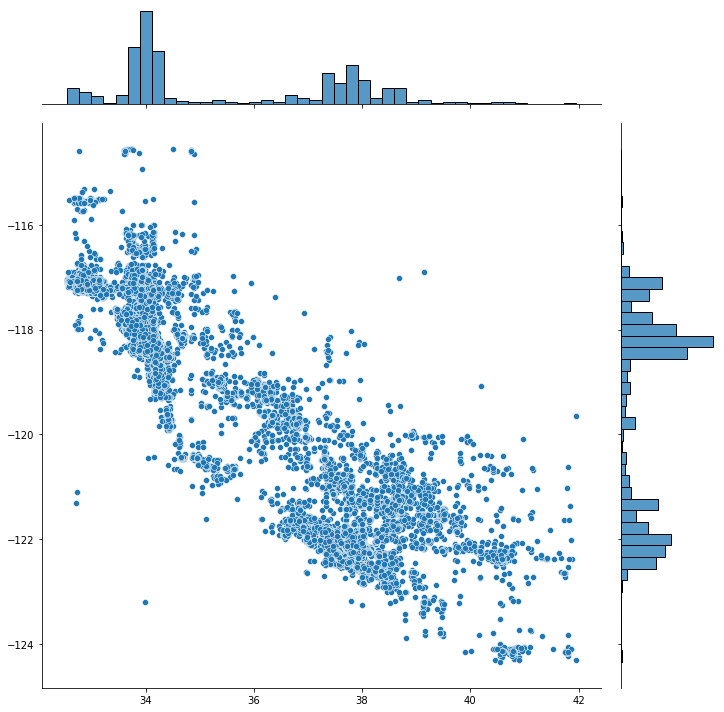

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [10]:
plt.figure(figsize=(10,10))
sns.jointplot(x=housing_train.latitude.values, y=housing_train.longitude.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

# Data Engineering

In [11]:
num_pipe = make_pipeline(
    RobustScaler(),
    StandardScaler(),
    MinMaxScaler()

)

In [12]:
housing_train.columns

Index(['id', 'medinc', 'houseage', 'averooms', 'avebedrms', 'population',
       'aveoccup', 'latitude', 'longitude', 'medhouseval'],
      dtype='object')

In [13]:
feature_transform = ColumnTransformer([
    ('do_nothing', 'passthrough', ['id', 'latitude', 'longitude', 'medhouseval']),
    ('num_preprocessing', num_pipe, ['medinc', 'houseage', 'averooms', 'avebedrms', 'population','aveoccup'])
    ])

In [14]:
feature_transform.fit_transform(housing_train)


array([[ 0.00000000e+00,  3.46000000e+01, -1.20120000e+02, ...,
         1.13917558e-01,  3.57913619e-02,  3.06148311e-03],
       [ 1.00000000e+00,  3.86900000e+01, -1.21220000e+02, ...,
         1.03145024e-01,  4.20695647e-02,  5.70289346e-03],
       [ 2.00000000e+00,  3.47100000e+01, -1.20450000e+02, ...,
         1.12256523e-01,  2.96532975e-02,  3.01689094e-03],
       ...,
       [ 3.71340000e+04,  3.77500000e+01, -1.22440000e+02, ...,
         1.11942100e-01,  3.23159281e-02,  9.59552489e-04],
       [ 3.71350000e+04,  3.84000000e+01, -1.20980000e+02, ...,
         1.05780185e-01,  1.62840887e-02,  3.69224819e-03],
       [ 3.71360000e+04,  3.63400000e+01, -1.19640000e+02, ...,
         1.03976668e-01,  3.74730233e-02,  5.67497004e-03]])

# Split Data

In [15]:
X=housing_train.drop(['medhouseval'], axis=1)
y=housing_train['medhouseval']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 12)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27852, 9), (9285, 9), (27852,), (9285,))

# Linear Regressor Model

In [18]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [19]:
round(mlr.score(X_train, y_train),3)

0.605

In [20]:
y_pred_train_LR =mlr.predict(X_train)

In [21]:
RMSE_LR=mean_squared_error(y_train, y_pred_train_LR)
RMSE_LR

0.5269118447837412

## Cross Validation

In [22]:
cross_R2_log_LR = cross_val_score(mlr,  #estimator: the model that you want to evalueate
                                     X_train, # the training data
                                     y_train,  # the training data
                                     cv = 5 , # number of cross validation datasets, k-folds
                                     scoring = 'r2' # evaluation metric

)

In [23]:
cross_R2_log_LR.mean()

0.19764533597940878

# Test

In [24]:
housing_test = pd.read_csv('data/test.csv')
housing_test.columns = housing_test.columns.str.lower()

In [25]:
housing_test.head(2)

,id,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29


In [26]:
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24759 entries, 0 to 24758
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          24759 non-null  int64  
 1   medinc      24759 non-null  float64
 2   houseage    24759 non-null  float64
 3   averooms    24759 non-null  float64
 4   avebedrms   24759 non-null  float64
 5   population  24759 non-null  float64
 6   aveoccup    24759 non-null  float64
 7   latitude    24759 non-null  float64
 8   longitude   24759 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.7 MB


In [27]:
housing_test.isna().sum()

id            0
medinc        0
houseage      0
averooms      0
avebedrms     0
population    0
aveoccup      0
latitude      0
longitude     0
dtype: int64

In [28]:
feature_transform_test = ColumnTransformer([
    ('do_nothing', 'passthrough', ['id', 'latitude', 'longitude']),
    ('num_preprocessing', num_pipe, ['medinc', 'houseage', 'averooms', 'avebedrms', 'population','aveoccup'])
    ])

In [29]:
feature_transform_test.fit_transform(housing_test)

array([[ 3.71370000e+04,  3.97500000e+01, -1.21850000e+02, ...,
         5.39777829e-02,  3.68564141e-02,  9.06554105e-03],
       [ 3.71380000e+04,  3.39500000e+01, -1.18290000e+02, ...,
         5.41477529e-02,  6.42674963e-02,  1.05293435e-02],
       [ 3.71390000e+04,  3.36100000e+01, -1.17810000e+02, ...,
         4.01686135e-02,  4.29384232e-02,  9.25942300e-03],
       ...,
       [ 6.18930000e+04,  3.75100000e+01, -1.20830000e+02, ...,
         6.14064465e-02,  1.09223913e-01,  7.73874690e-03],
       [ 6.18940000e+04,  3.36700000e+01, -1.17980000e+02, ...,
         4.61460351e-02,  3.88183525e-02,  8.00538281e-03],
       [ 6.18950000e+04,  3.79600000e+01, -1.22470000e+02, ...,
         4.42655936e-02,  3.36332296e-04,  7.56423633e-03]])

In [30]:
X_test = housing_test

In [31]:
#predictions on real data
y_pred = mlr.predict(X_test)

In [32]:
output = pd.DataFrame({'id': X_test.id, 'MedHouseVal': y_pred})
output.to_csv('submission1_Jan6_2023.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
